## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_unit in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_unit, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_unit, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
import itertools

MONITER = ['val_loss','val_acc']
PATIENCE = [5, 10, 25]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i, (moniter, patience) in enumerate(itertools.product(MONITER, PATIENCE)):
    keras.backend.clear_session()
    print('Number of exp:%i, moniter:%s, patience:%i'%(i, moniter, patience))
    
    earlystop = EarlyStopping(monitor=moniter, patience=patience, verbose=1)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS, batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True,
             callbacks=[earlystop])
    
    # collection train processing data
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = ('exp-%s' % (i))
    results[name_tag]={'train-loss': train_loss, 'val-loss':valid_loss, 'train-acc':train_acc, 'valid-acc':valid_acc}

Number of exp:0, moniter:val_loss, patience:5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normali

50000/50000 [==============================] - 7s 134us/step - loss: 1.3506 - accuracy: 0.5326 - val_loss: 1.5115 - val_accuracy: 0.4661
Epoch 10/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3209 - accuracy: 0.5450 - val_loss: 1.4971 - val_accuracy: 0.4718
Epoch 11/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2926 - accuracy: 0.5534 - val_loss: 1.4906 - val_accuracy: 0.4756
Epoch 12/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.2662 - accuracy: 0.5612 - val_loss: 1.4773 - val_accuracy: 0.4821
Epoch 13/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.2406 - accuracy: 0.5710 - val_loss: 1.4730 - val_accuracy: 0.4824
Epoch 14/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.2161 - accuracy: 0.5806 - val_loss: 1.4651 - val_accuracy: 0.4872
Epoch 15/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.1902 - accuracy: 0.5886 - val_loss:

Epoch 24/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.9781 - accuracy: 0.6698 - val_loss: 1.4711 - val_accuracy: 0.4908
Epoch 25/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.9582 - accuracy: 0.6776 - val_loss: 1.4550 - val_accuracy: 0.4970
Epoch 26/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.9377 - accuracy: 0.6870 - val_loss: 1.4772 - val_accuracy: 0.4935
Epoch 27/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.9177 - accuracy: 0.6929 - val_loss: 1.4691 - val_accuracy: 0.4973
Epoch 28/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.8988 - accuracy: 0.7032 - val_loss: 1.4812 - val_accuracy: 0.4969
Epoch 29/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.8775 - accuracy: 0.7103 - val_loss: 1.4823 - val_accuracy: 0.4981
Epoch 30/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.8587 - accuracy:

C:\Users\freet\Anaconda3\envs\py35\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,val_accuracy,val_loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 12s 236us/step - loss: 1.7466 - accuracy: 0.3908 - val_loss: 1.9693 - val_accuracy: 0.3047
Epoch 3/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.6216 - accuracy: 0.4318 - val_loss: 1.8208 - val_accuracy: 0.3766
Epoch 4/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.5476 - accuracy: 0.4605 - val_loss: 1.7193 - val_accuracy: 0.4076
Epoch 5/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.4899 - accuracy: 0.4775 - val_loss: 1.6304 - val_accuracy: 0.4384
Epoch 6/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.4430 - accuracy: 0.4959 - val_loss: 1.5795 - val_accuracy: 0.4497
Epoch 7/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.4036 - accuracy: 0.5104 - val_loss: 1.5442 - val_accuracy: 0.4593
Epoch 8/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.3683 - accuracy: 0.5230 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.2428 - accuracy: 0.2696 - val_loss: 2.1466 - val_accuracy: 0.2100
Epoch 2/50


C:\Users\freet\Anaconda3\envs\py35\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,val_accuracy,val_loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 12s 242us/step - loss: 1.7526 - accuracy: 0.3894 - val_loss: 1.9715 - val_accuracy: 0.2969
Epoch 3/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.6230 - accuracy: 0.4341 - val_loss: 1.8310 - val_accuracy: 0.3646
Epoch 4/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.5490 - accuracy: 0.4596 - val_loss: 1.7184 - val_accuracy: 0.3999
Epoch 5/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.4930 - accuracy: 0.4816 - val_loss: 1.6416 - val_accuracy: 0.4261
Epoch 6/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.4478 - accuracy: 0.4949 - val_loss: 1.6031 - val_accuracy: 0.4352
Epoch 7/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.4088 - accuracy: 0.5121 - val_loss: 1.5569 - val_accuracy: 0.4468
Epoch 8/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.3735 - accuracy: 0.5247 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.1946 - accuracy: 0.2715 - val_loss: 2.1577 - val_accuracy: 0.1772
Epoch 2/50


C:\Users\freet\Anaconda3\envs\py35\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,val_accuracy,val_loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 11s 225us/step - loss: 1.7421 - accuracy: 0.3928 - val_loss: 1.9804 - val_accuracy: 0.2753
Epoch 3/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.6195 - accuracy: 0.4333 - val_loss: 1.8212 - val_accuracy: 0.3699
Epoch 4/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5459 - accuracy: 0.4607 - val_loss: 1.7068 - val_accuracy: 0.4120
Epoch 5/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.4903 - accuracy: 0.4787 - val_loss: 1.6289 - val_accuracy: 0.4339
Epoch 6/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.4466 - accuracy: 0.4950 - val_loss: 1.5789 - val_accuracy: 0.4461
Epoch 7/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.4091 - accuracy: 0.5094 - val_loss: 1.5443 - val_accuracy: 0.4622
Epoch 8/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3732 - accuracy: 0.5230 - val_loss

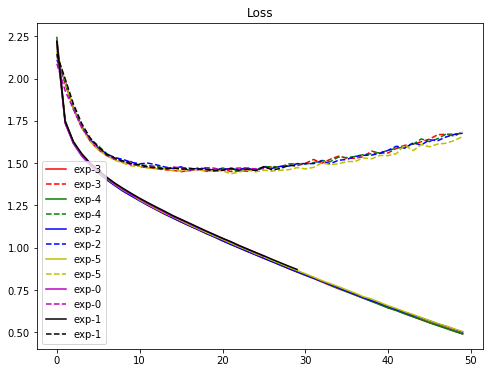

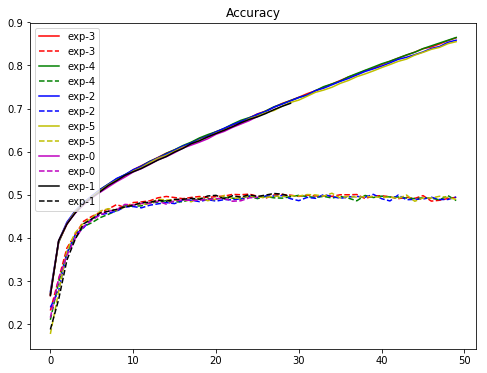

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k','gray','purple','orange','brown','pink','olive','cyan','gray']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val-loss'])), results[cond]['val-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()